## Feature Selection Based on Mutual Information (Entropy) Gain for Classification and Regression 

#### Watch it here: https://youtu.be/GpL_XtRVne4
#### Watch Full Playlist: https://www.youtube.com/playlist?list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

### What is Mutual Information 

The elimination process aims to reduce the size of the input feature set and at the same time to retain the class discriminatory information for classification problems.

Mutual information (MI) is a measure of the amount of information between two random variables is symmetric and non-negative, and it could be zero if and only if the variables are independent. 

![image.png](attachment:image.png)

It is NP hard optimization problem in computer science branch. The best approach which we in general follow is greedy solution for feature selection. Those approaches are step-wise forward feature selection or step-wise backward feature selection. 

![image.png](attachment:image.png)

### Classification Problem
Dataset Available at: https://github.com/laxmimerit/Data-Files-for-Feature-Selection

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/DATA PREPROCESSING/CODE/FEATURE SELECTION/Filtering Method/santander.txt', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [34]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Remove constant, quasi constant, and duplicate features 

In [36]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [37]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [38]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [39]:
X_train_T.duplicated().sum()

18

In [14]:
duplicated_features = X_train_T.duplicated()

In [15]:
features_to_keep = [not index for index in duplicated_features]

In [16]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [17]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Calculate the MI 

In [40]:
mi = mutual_info_classif(X_train_unique, y_train)

In [19]:
len(mi)

227

In [20]:
mi

array([2.83428304e-03, 0.00000000e+00, 1.32821959e-02, 8.73561003e-04,
       0.00000000e+00, 0.00000000e+00, 3.70740360e-05, 0.00000000e+00,
       0.00000000e+00, 1.90362175e-03, 1.59098481e-03, 0.00000000e+00,
       1.16874795e-03, 6.26524734e-04, 8.02307404e-04, 8.97232713e-04,
       2.61516342e-03, 3.02394705e-03, 0.00000000e+00, 6.17418522e-04,
       0.00000000e+00, 2.60903985e-03, 9.05278063e-03, 5.64833315e-04,
       1.40800215e-03, 1.16111494e-03, 1.07204168e-03, 1.78579646e-03,
       1.83305374e-03, 3.05785221e-04, 3.48232318e-03, 3.86486102e-03,
       1.65284982e-03, 1.19839357e-03, 0.00000000e+00, 3.78643065e-03,
       2.05175305e-04, 1.71193386e-03, 1.07837749e-02, 1.17813534e-04,
       0.00000000e+00, 4.38102839e-03, 3.55648473e-03, 6.11928409e-04,
       0.00000000e+00, 1.18089101e-02, 2.01365381e-03, 1.04764140e-02,
       0.00000000e+00, 9.33378816e-04, 0.00000000e+00, 0.00000000e+00,
       2.37296568e-03, 3.50878550e-03, 0.00000000e+00, 1.96224672e-04,
      

In [21]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [22]:
mi.sort_values(ascending=False, inplace = True)

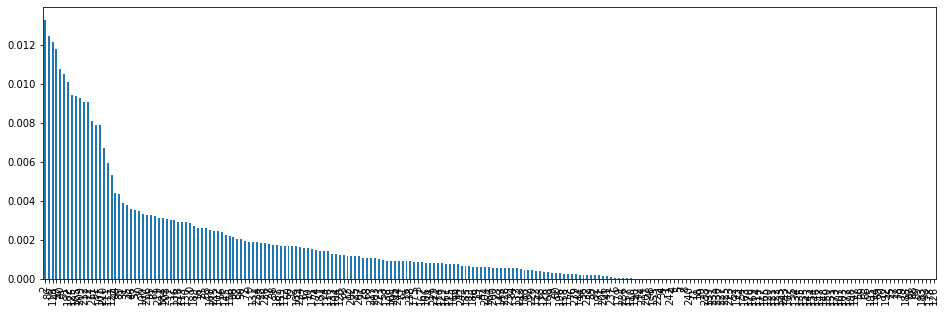

In [23]:
mi.plot.bar(figsize = (16,5))

In [25]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  12,  22,  23,  40,  49,  51,  56,  86,  91,  95,  98, 101,
            105, 111, 119, 125, 127, 182, 209, 210, 211, 212],
           dtype='int64')

In [ ]:
len(X_train_unique.columns[sel.get_support()])

23

In [26]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x7fe413fa64d0>, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feature scores, None if `score_func` returned only s

In [27]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [28]:
X_train_mi.shape

(16000, 23)

### Build the model and compare the performance

In [29]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [30]:
%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.958
CPU times: user 2.33 s, sys: 28.1 ms, total: 2.36 s
Wall time: 1.36 s


In [31]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 6.08 s, sys: 26.8 ms, total: 6.1 s
Wall time: 3.2 s


In [32]:
(1.46-0.57)*100/1.46


60.95890410958904

### Mutual Information Gain in Regression 

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)

In [ ]:
mi

LSTAT      0.679664
RM         0.560279
INDUS      0.514883
PTRATIO    0.476028
NOX        0.453753
TAX        0.388035
CRIM       0.355854
AGE        0.342615
DIS        0.319469
ZN         0.202716
RAD        0.188252
B          0.147638
CHAS       0.028292
dtype: float64

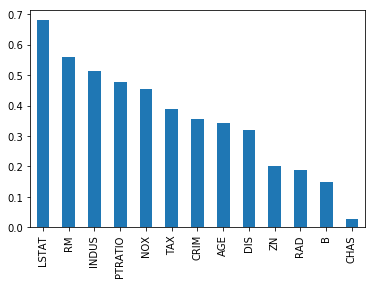

In [ ]:
mi.plot.bar()

In [ ]:
sel = SelectKBest(mutual_info_regression, k = 9).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
r2_score(y_test, y_predict)

0.5892223849182492

In [ ]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.783509315085146

In [ ]:
np.std(y)

9.188011545278203

In [ ]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)

In [ ]:
X_test_9 = sel.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_9, y_train)
y_predict = model.predict(X_test_9)
print('r2_score')
r2_score(y_test, y_predict)


r2_score


0.5317127606961576

In [ ]:
print('rmse')
np.sqrt(mean_squared_error(y_test, y_predict))

rmse


6.175103151293747